# ABOUT DATASET:
The dataset has the columns correspond to various features of the employee's job and performance.

# OBJECTIVE:
__To create a model to predict Whether the Employee will leave the Company or not__

__Retention Analysis: Create a predictive model to determine the factors that contribute to employee turnover and identify potential retention strategies__

__Employee Engagement Analysis: Use machine learning techniques to analyze employee data and identify patterns that indicate disengagement or dissatisfaction, leading to potential attrition__


__Human Resources Decision Support: Build a model to support HR decision-making by predicting the likelihood of an employee leaving the company based on various factor__

# INPUT FEATURES:-
1. __satisfaction_level__		
2. __number_project__	
3. __average_montly_hours__	
4. __time_spend_company__		
5. __promotion_last_5years__	
6. __Department__
6. __salary__

# OUTPUT FEATURES:-
 1. __left__

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

# Getting Data

In [2]:
raw_data=pd.read_csv("D:\\project\\data set\\Survey Responses  - Form Responses 1.csv")

In [3]:
raw_data

,Timestamp,Name,IT Company,Satisfaction Level,Number Of Project,Average Monthly Hours,Time Spend Company,Work accident,Left,Promotion Last Five years,Department,Salary
0,6/11/2023 0:06,Aarav Patel,Infosys,Low,2,157,3,No,Yes,No,sales,low
1,6/11/2023 0:06,Aisha Sharma,HCL,Very High,5,262,6,No,Yes,No,sales,medium
2,6/11/2023 0:06,Arjun Gupta,Tech Mahindra,Very Low,7,272,4,No,Yes,No,sales,medium
3,6/11/2023 0:06,Diya Singh,Cognizant,High,5,223,5,No,Yes,No,sales,low
4,6/11/2023 0:06,Ishaan Verma,Wipro,Low,2,159,3,No,Yes,No,sales,low
...,...,...,...,...,...,...,...,...,...,...,...,...
522,6/11/2023 0:29,Ishika Chauhan,Accenture,High,3,231,3,No,No,No,technical,low
523,6/11/2023 0:29,Jia Patel,HCL,Very High,3,259,4,No,No,No,technical,low
524,6/11/2023 0:29,Kashvi Kapoor,Tech Mahindra,High,3,238,2,No,No,No,technical,low
525,6/11/2023 0:29,Krishiv Mehta,Infosys,High,3,210,3,No,No,No,technical,low


In [4]:
##removing unnecessary columns 
raw_data.drop(['Timestamp', 'Name'], axis=1, inplace=True)

# Initial Review

In [5]:
raw_data.shape

(527, 10)

In [6]:
raw_data.isnull().sum()

IT Company                    6
Satisfaction Level            0
Number Of Project             0
Average Monthly Hours         0
Time Spend Company            0
Work accident                 0
Left                          0
Promotion Last Five years     0
Department                    0
Salary                        0
dtype: int64

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   IT Company                  521 non-null    object
 1   Satisfaction Level          527 non-null    object
 2   Number Of Project           527 non-null    int64 
 3   Average Monthly Hours       527 non-null    int64 
 4   Time Spend Company          527 non-null    int64 
 5   Work accident               527 non-null    object
 6   Left                        527 non-null    object
 7   Promotion Last Five years   527 non-null    object
 8   Department                  527 non-null    object
 9   Salary                      527 non-null    object
dtypes: int64(3), object(7)
memory usage: 41.3+ KB


# Checking Duplicates

In [8]:
raw_data.duplicated().sum()

0

# Exploring categorical features

In [9]:
raw_data.Salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [10]:
raw_data.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

# EDA

# Salary count

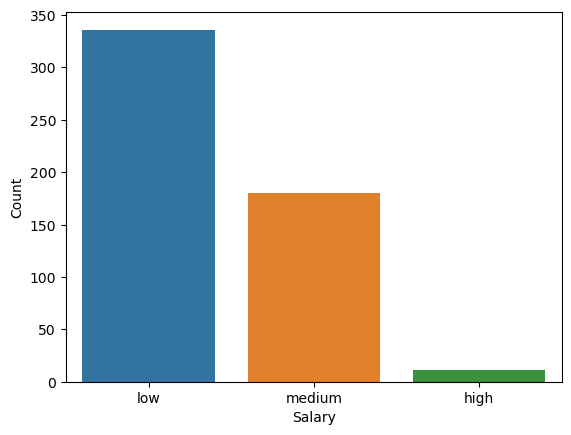

low: 336
medium: 180
high: 11


In [11]:
sns.countplot(data=raw_data, x='Salary')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()


count_values = raw_data['Salary'].value_counts()
for index, value in count_values.items():
    print(f"{index}: {value}")

Larger number of employees are __underpaid__

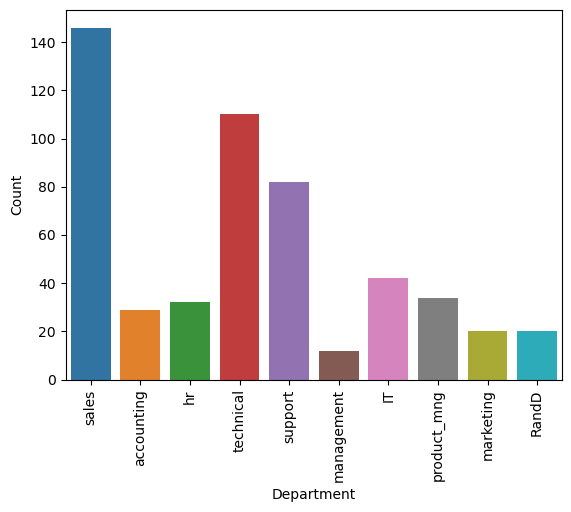

sales: 146
technical: 110
support: 82
IT: 42
product_mng: 34
hr: 32
accounting: 29
marketing: 20
RandD: 20
management: 12


In [12]:
sns.countplot(data=raw_data, x='Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

count_values = raw_data['Department'].value_counts()
for index, value in count_values.items():
    print(f"{index}: {value}")

__Sales__ has the highest number of employess!

# Department VS Average monthly hour

In [13]:
Working_hours_dep=raw_data.groupby('Department')['Average Monthly Hours'].median()
Working_hours_dep

Department
IT             242.5
RandD          218.0
accounting     192.0
hr             200.0
management     197.0
marketing      199.0
product_mng    217.0
sales          214.5
support        176.0
technical      208.5
Name: Average Monthly Hours, dtype: float64

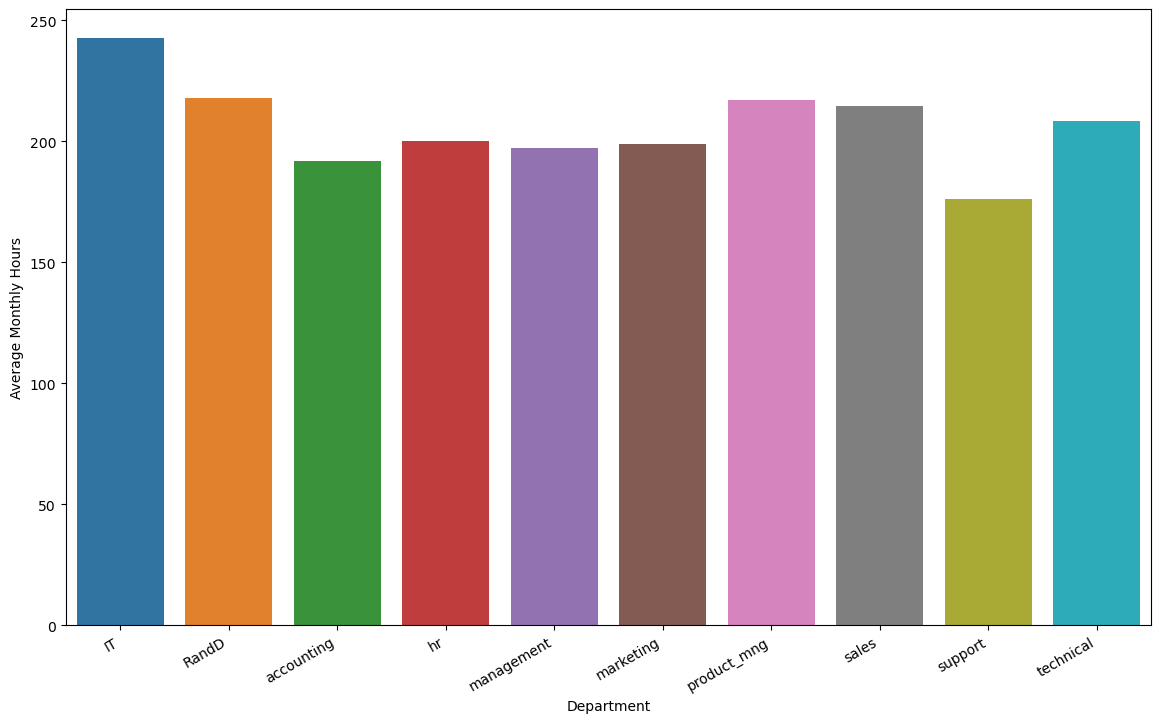

In [14]:
fig = plt.figure(figsize=(14,8))
ax=sns.barplot(x=Working_hours_dep.index,y= Working_hours_dep)
ax.set_xticklabels(Working_hours_dep.index,rotation=30,ha='right')
plt.show()

Management has a bit higher average monthly hours. Otherwise all the departments have almost same working hours.

# Average Monthly Hours count

In [15]:
Working_hours_sal=raw_data.groupby('Salary')['Average Monthly Hours'].median()
Working_hours_sal

Salary
high      161.0
low       203.5
medium    209.5
Name: Average Monthly Hours, dtype: float64

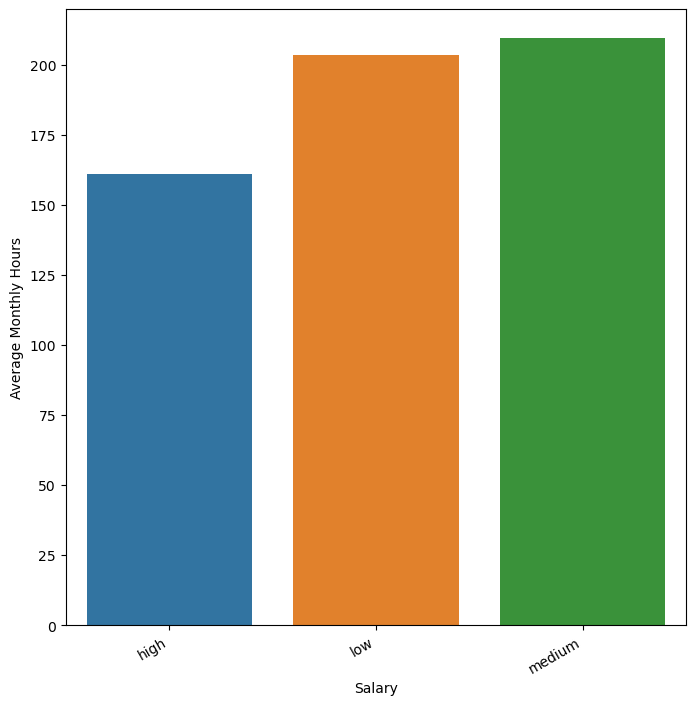

In [16]:
fig = plt.figure(figsize=(8,8))
ax=sns.barplot(x=Working_hours_sal.index,y= Working_hours_sal)
ax.set_xticklabels(Working_hours_sal.index,rotation=30,ha='right')
plt.show()

The working hours for high, low and medium salary workers are the same !

# Number of Employees  Left

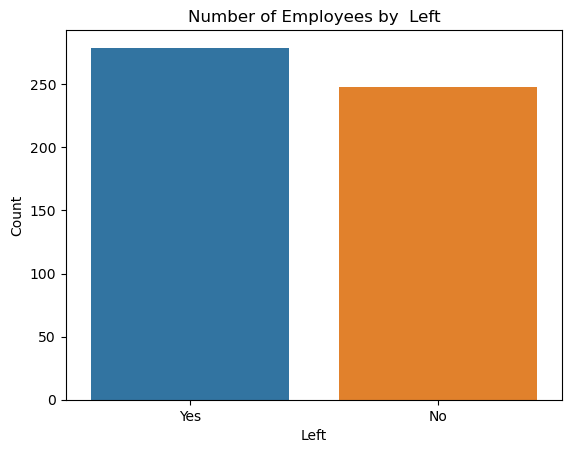

Percentage of Current Employees is 47.1% and of Ex-employees is: 52.9%
Yes: 279
No: 248


In [17]:
#Visualize the number of employees that stayes and left  the company
sns.countplot(data=raw_data, x='Left ')
plt.xlabel('Left')
plt.ylabel('Count')
plt.title('Number of Employees by  Left')
plt.show()

#Attrition percentage
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    raw_data[raw_data['Left '] == 'No'].shape[0] / raw_data.shape[0]*100,
    raw_data[raw_data['Left '] == 'Yes'].shape[0] / raw_data.shape[0]*100))


count_values = raw_data['Left '].value_counts()
for index, value in count_values.items():
    print(f"{index}: {value}")

# Department VS Left

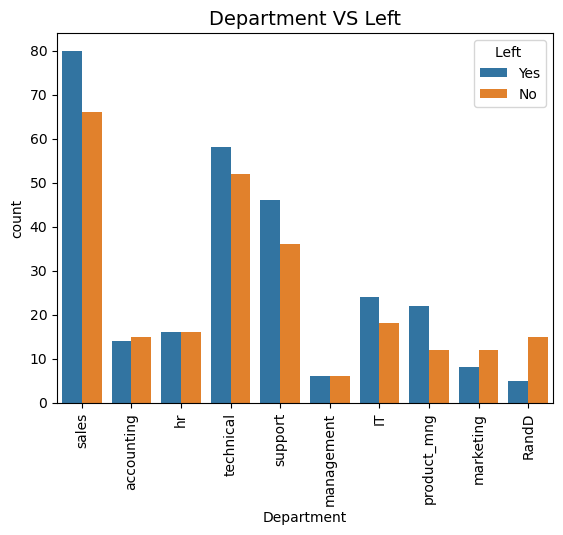

Left   Department 
No     sales          66
       technical      52
       support        36
       IT             18
       hr             16
       RandD          15
       accounting     15
       marketing      12
       product_mng    12
       management      6
Yes    sales          80
       technical      58
       support        46
       IT             24
       product_mng    22
       hr             16
       accounting     14
       marketing       8
       management      6
       RandD           5
Name: Department, dtype: int64


In [18]:
# Plotting Deparment and Attrition
sns.countplot(x='Department', hue='Left ', data=raw_data)
plt.title("Department VS Left", fontsize=14)
plt.xticks(rotation=90)
plt.show()

groupby_d = raw_data.groupby("Left ")["Department"]
print(groupby_d.value_counts())

In [19]:
# Calculating percentage for each department
total_resigned = raw_data['Left '].value_counts()['Yes']
total_departments = raw_data['Department'].nunique()

resigned_percentage_by_department = (raw_data[raw_data['Left '] == 'Yes']['Department'].value_counts() / total_resigned) * 100


print("Percentage of employees resigned/retired by Department:")
print(resigned_percentage_by_department)


Percentage of employees resigned/retired by Department:
sales          28.673835
technical      20.788530
support        16.487455
IT              8.602151
product_mng     7.885305
hr              5.734767
accounting      5.017921
marketing       2.867384
management      2.150538
RandD           1.792115
Name: Department, dtype: float64


# Plotting Job Satisfaction and Left count

# Satisfaction vs Left

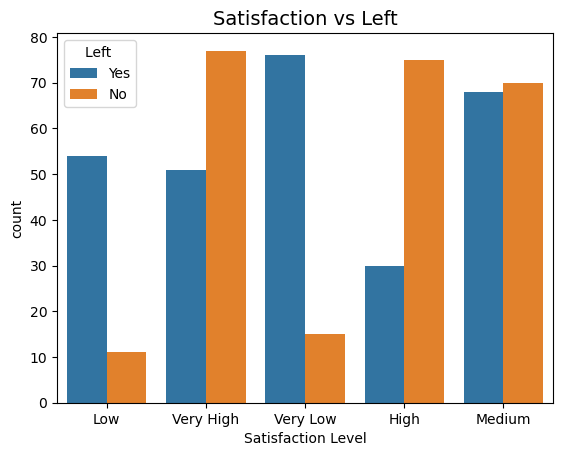

Left   Satisfaction Level
No     Very High             77
       High                  75
       Medium                70
       Very Low              15
       Low                   11
Yes    Very Low              76
       Medium                68
       Low                   54
       Very High             51
       High                  30
Name: Satisfaction Level, dtype: int64


In [20]:
# Plotting Job Satisfaction and Left count
sns.countplot(x='Satisfaction Level', hue='Left ', data=raw_data)
plt.title("Satisfaction vs Left", fontsize=14)
plt.show()

groupby_js = raw_data.groupby("Left ")["Satisfaction Level"]
print(groupby_js.value_counts())


In [21]:
# Calculating percentage for each job satisfaction level
total_resigned = raw_data['Left '].value_counts()['Yes']

resigned_percentage_by_job_satisfaction = (raw_data[raw_data['Left '] == 'Yes']['Satisfaction Level'].value_counts() / total_resigned) * 100

print("Percentage of employees resigned/retired by Job Satisfaction:")
print(resigned_percentage_by_job_satisfaction)

Percentage of employees resigned/retired by Job Satisfaction:
Very Low     27.240143
Medium       24.372760
Low          19.354839
Very High    18.279570
High         10.752688
Name: Satisfaction Level, dtype: float64


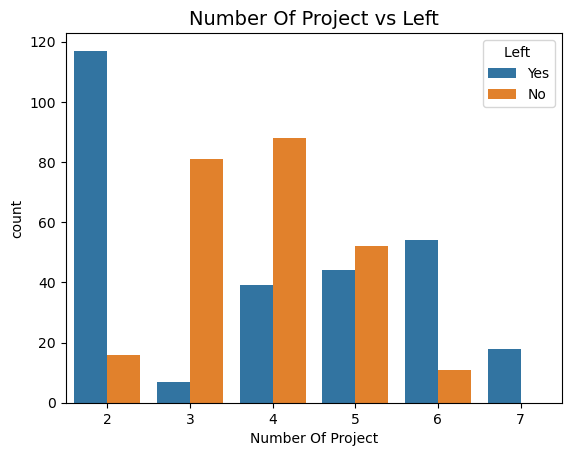

Left   Number Of Project
No     4                     88
       3                     81
       5                     52
       2                     16
       6                     11
Yes    2                    117
       6                     54
       5                     44
       4                     39
       7                     18
       3                      7
Name: Number Of Project, dtype: int64


In [22]:
# Plotting Job Satisfaction and Left count
sns.countplot(x='Number Of Project', hue='Left ', data=raw_data)
plt.title("Number Of Project vs Left", fontsize=14)
plt.show()

groupby_js = raw_data.groupby("Left ")["Number Of Project"]
print(groupby_js.value_counts())

In [23]:
# Calculating percentage for each Number Of Project
total_resigned = raw_data['Left '].value_counts()['Yes']

resigned_percentage_by_NOP = (raw_data[raw_data['Left '] == 'Yes']['Number Of Project'].value_counts() / total_resigned) * 100

print("Percentage of employees resigned/retired by Number Of Project:")
print(resigned_percentage_by_NOP)

Percentage of employees resigned/retired by Number Of Project:
2    41.935484
6    19.354839
5    15.770609
4    13.978495
7     6.451613
3     2.508961
Name: Number Of Project, dtype: float64


# Checking Correlation B/w Input & Target Variable

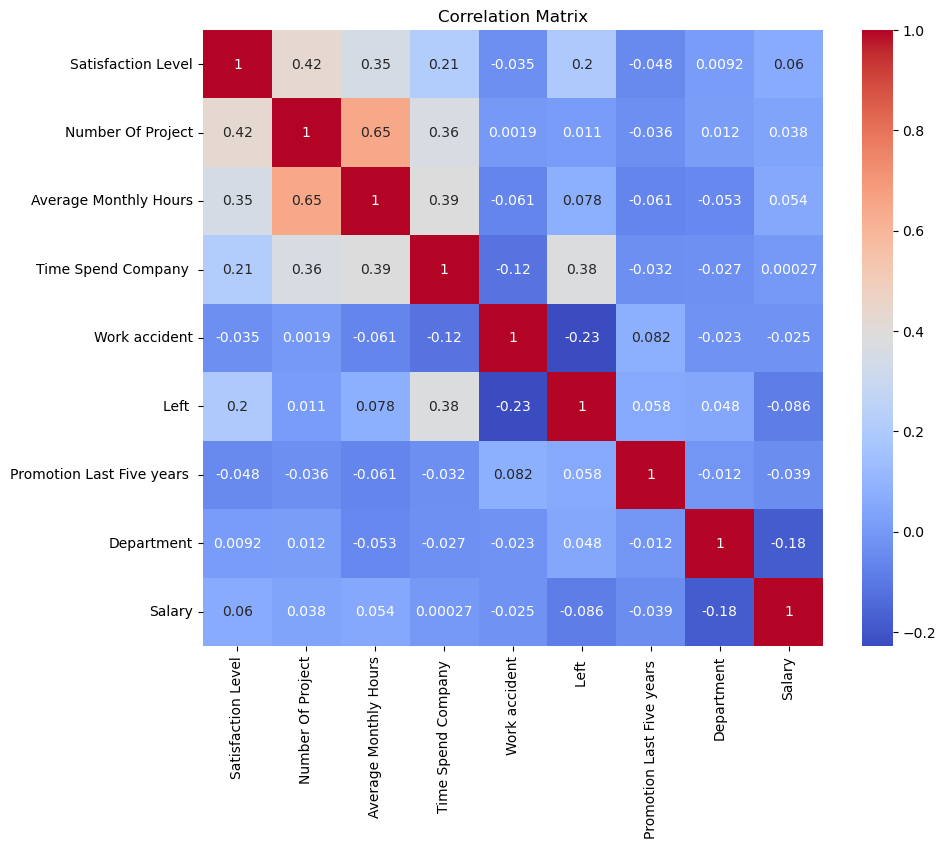

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Select the categorical columns
categorical_columns = ['Satisfaction Level', 'Work accident', 'Left ', 'Promotion Last Five years ', 'Department', 'Salary']

# Create a copy of the DataFrame to work with
data = raw_data.copy()

# Encode the categorical columns using label encoding
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.title('Correlation Matrix')
plt.show()


In [25]:
# Calculate the correlation of 'Left' with other attributes
left_corr = correlation_matrix['Left ']

# Remove 'Left' from the correlation series
left_corr = left_corr.drop('Left ')

# Sort the correlation series in descending order
sorted_corr = left_corr.abs().sort_values(ascending=False)

# Get the top 3 highly correlated attributes with 'Left'
top_pos_corr = sorted_corr.head(3)
top_neg_corr = sorted_corr.tail(3)

# Print the top 3 highly correlated attributes with 'Left'
print("Top 3 highly correlated attributes with 'Left':")
for attribute, correlation in top_pos_corr.items():
    print(f"{attribute}: {correlation}")

# Print the top 3 negatively correlated attributes with 'Left'
print("\nTop 3 negatively correlated attributes with 'Left':")
for attribute, correlation in top_neg_corr.items():
    print(f"{attribute}: {correlation}")


Top 3 highly correlated attributes with 'Left':
Time Spend Company : 0.3762925659340567
Work accident: 0.2282679936481802
Satisfaction Level: 0.19699501328441535

Top 3 negatively correlated attributes with 'Left':
Promotion Last Five years : 0.05819143739626466
Department: 0.04802363393670894
Number Of Project: 0.010854442073568863


# Checking Outliers

<Figure size 1000x800 with 0 Axes>

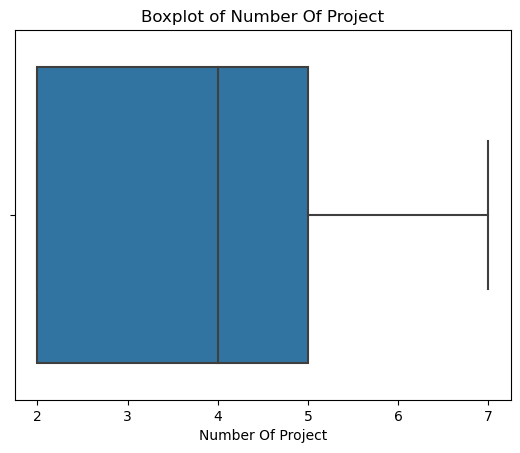

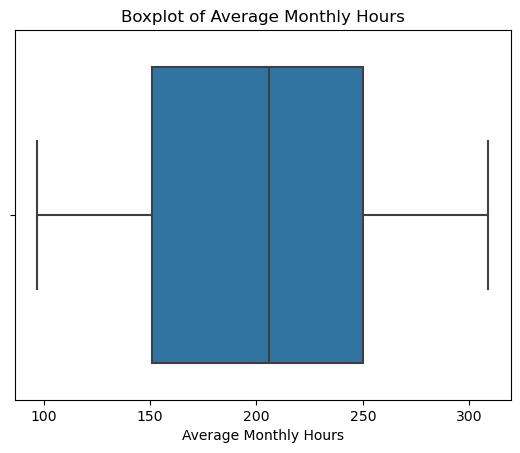

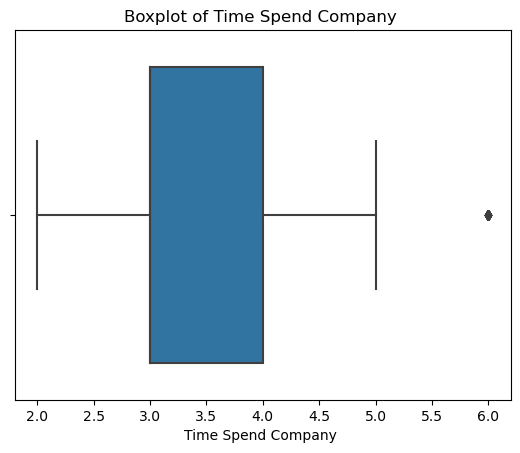

In [26]:
# Create a copy of the DataFrame to work with
data = raw_data.copy()

# Select the numerical columns for outlier detection
numerical_columns = ['Number Of Project', 'Average Monthly Hours', 'Time Spend Company ']

# Generate box plots for each numerical column
plt.figure(figsize=(10, 8))
for column in numerical_columns:
    plt.figure()
    sns.boxplot(x=column, data=data)
    plt.title(f'Boxplot of {column}')
    plt.show()


In [27]:
# Select the categorical columns
categorical_columns = ['Satisfaction Level', 'Work accident', 'Left ', 'Promotion Last Five years ', 'Department', 'Salary']

# Create a copy of the DataFrame to work with
data = raw_data.copy()

# Encode the categorical columns using label encoding
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])


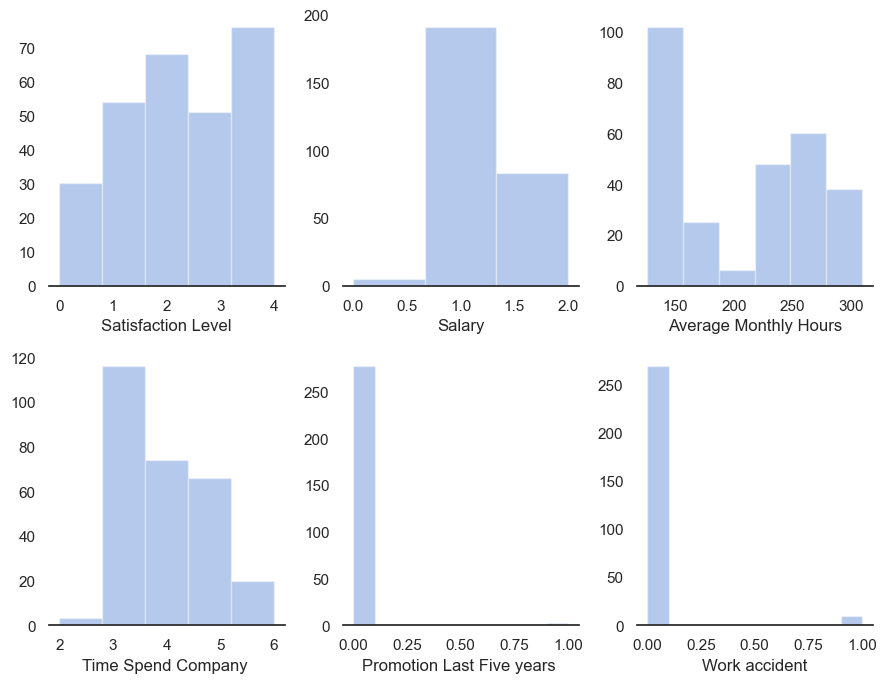

In [28]:
    sns.set(style="white", palette="muted", color_codes=True)

    # Set up the matplotlib figure
    f, axes = plt.subplots(2, 3, figsize=(9,7))
    sns.despine(left=True)

    #people that left
    leavers = data.loc[data['Left '] == 1]

    # Plot a simple histogram with binsize determined automatically
    sns.distplot(leavers['Satisfaction Level'], kde=False, color="b", ax=axes[0,0])
    sns.distplot(leavers['Salary'], bins=3, kde=False, color="b", ax=axes[0, 1])
    sns.distplot(leavers['Average Monthly Hours'], kde=False, color="b", ax=axes[0, 2])
    sns.distplot(leavers['Time Spend Company '], kde=False, bins=5, color="b", ax=axes[1, 0])
    sns.distplot(leavers['Promotion Last Five years '],bins=10, kde=False, color="b", ax=axes[1,1])
    sns.distplot(leavers['Work accident'], bins=10,kde=False, color="b", ax=axes[1, 2])

    plt.tight_layout()
    plt.show()

   

In [29]:
print("So, from the plots we can see that most of the employees that left the company left because of thefoloowing reasons -:\n1.Salary \n2.Average Montly Hours \n3.satisfaction level\n")

So, from the plots we can see that most of the employees that left the company left because of thefoloowing reasons -:
1.Salary 
2.Average Montly Hours 
3.satisfaction level



# Model Bulding

In [30]:
# Define the categorical columns
categorical_columns = ['Satisfaction Level', 'Work accident', 'Promotion Last Five years ', 'Department', 'Salary']

# Perform one-hot encoding
df3 = pd.get_dummies(raw_data, columns=categorical_columns)
df3.drop('IT Company', axis=1, inplace=True)

# Encode the categorical columns using label encoding
col=['Left ']
label_encoder = LabelEncoder()
for column in col:
    df3[column] = label_encoder.fit_transform(df3[column])

# Print the encoded data
df3.head()

,Number Of Project,Average Monthly Hours,Time Spend Company,Left,Satisfaction Level_High,Satisfaction Level_Low,Satisfaction Level_Medium,Satisfaction Level_Very High,Satisfaction Level_Very Low,Work accident_No,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,Salary_high,Salary_low,Salary_medium
0,2,157,3,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,5,262,6,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
2,7,272,4,1,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
3,5,223,5,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,2,159,3,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [31]:
X = df3.loc[:, df3.columns != 'Left ']
Y = df3.loc[:, df3.columns == 'Left ']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)
X_train.head()

,Number Of Project,Average Monthly Hours,Time Spend Company,Satisfaction Level_High,Satisfaction Level_Low,Satisfaction Level_Medium,Satisfaction Level_Very High,Satisfaction Level_Very Low,Work accident_No,Work accident_Yes,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,Salary_high,Salary_low,Salary_medium
350,2,145,3,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
199,3,182,3,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
379,4,242,6,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
399,7,282,5,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
0,2,157,3,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


# RandomForestClassifier

In [32]:
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
acc_rf = accuracy_score(Y_test, pred)
precision_rf = precision_score(Y_test, pred)
recall_rf = recall_score(Y_test, pred)
f1score_rf = f1_score(Y_test, pred)
print("Accuracy of the algorithm: ", acc_rf)
print("Precison of the algorithm: ", precision_rf)
print("Recall of the algorithm: ", recall_rf)
print("F1_Score of the algorithm: ", f1score_rf)

print("Total number of employees which are likely to leave: ", sum(pred))

Accuracy of the algorithm:  0.8930817610062893
Precison of the algorithm:  0.8941176470588236
Recall of the algorithm:  0.9047619047619048
F1_Score of the algorithm:  0.8994082840236687
Total number of employees which are likely to leave:  85


In [33]:
df4 = df3[df3['Left ']==0]
df4.head()
df4.drop('Left ', axis=1, inplace=True)
df4.head()
a = df4.values

prob = clf.predict_proba(a)
print('Number of employees that will definitely leave: ', sum(prob[:, 1]==1))

Number of employees that will definitely leave:  0


In [34]:
df4['SoonLeave'] = prob[:, 1]
df4[df4['SoonLeave'] > 0.5]

,Number Of Project,Average Monthly Hours,Time Spend Company,Satisfaction Level_High,Satisfaction Level_Low,Satisfaction Level_Medium,Satisfaction Level_Very High,Satisfaction Level_Very Low,Work accident_No,Work accident_Yes,...,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,Salary_high,Salary_low,Salary_medium,SoonLeave
149,2,202,3,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0.56
176,2,160,4,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0.69
191,2,140,3,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0.82
236,2,194,6,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0.71
242,2,185,3,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0.52
482,5,283,5,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0.69
484,2,144,3,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0.92
499,2,188,4,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0.63
507,3,244,5,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0.51


In [35]:
soonleave = sum(prob[:, 1] > 0.5)
soonleave
print('So, ' + str(soonleave) + ' employees will soon leave the company.')

So, 9 employees will soon leave the company.


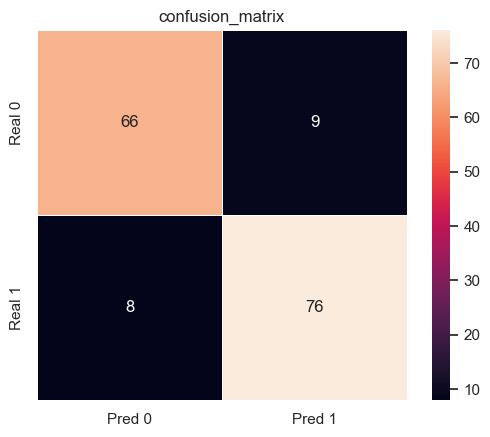

<Figure size 600x500 with 0 Axes>

In [36]:
ax = plt.axes()
ax.set_title("confusion_matrix")

df_cm=pd.DataFrame(confusion_matrix(Y_test, pred), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

 # SVM.SVC Classifier

In [36]:
features_one = X_train[['Number Of Project', 'Average Monthly Hours', 'Time Spend Company ',
       'Satisfaction Level_High', 'Satisfaction Level_Low',
       'Satisfaction Level_Medium', 'Satisfaction Level_Very High',
       'Satisfaction Level_Very Low', 'Work accident_No', 'Work accident_Yes',
       'Promotion Last Five years _No', 'Promotion Last Five years _Yes',
       'Department_IT', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'Salary_high', 'Salary_low', 'Salary_medium']].values
num_folds = 10
num_instances = X_train.shape[0] 
seed=7
scoring1 = 'accuracy'
scoring2 = 'roc_auc'
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)


                               
clf = SVC()
clf.fit(features_one, Y_train)


# Print normal score
print(clf.score(features_one, Y_train))

results1 = cross_val_score(clf, features_one, Y_train, cv=kfold, scoring=scoring1)
results2 = cross_val_score(clf, features_one, Y_train, cv=kfold, scoring=scoring2)



#Print cross validation score
print(results1.mean(), results1.std())



#Print AUC
print(results2.mean(), results2.std())

test_features = X_test[['Number Of Project', 'Average Monthly Hours', 'Time Spend Company ',
                        'Satisfaction Level_High', 'Satisfaction Level_Low','Satisfaction Level_Medium',
                        'Satisfaction Level_Very High','Satisfaction Level_Very Low', 'Work accident_No',
                        'Work accident_Yes','Promotion Last Five years _No', 'Promotion Last Five years _Yes',
                        'Department_IT', 'Department_RandD', 'Department_accounting',
                        'Department_hr', 'Department_management', 'Department_marketing',
                        'Department_product_mng', 'Department_sales', 'Department_support',
                        'Department_technical', 'Salary_high', 'Salary_low', 'Salary_medium']].values
# Make your prediction using the test set
svm_prediction = clf.predict(test_features)

acc = accuracy_score(Y_test, svm_prediction)
precision = precision_score(Y_test, svm_prediction)
recall = recall_score(Y_test, svm_prediction)
f1score = f1_score(Y_test, svm_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)

print("Total number of employees which are likely to leave: ", sum(svm_prediction))

0.6820652173913043
0.6171171171171173 0.08746423460293368
0.7005285272003539 0.10205973753138543
Accuracy of the algorithm:  0.7044025157232704
Precison of the algorithm:  0.7032967032967034
Recall of the algorithm:  0.7619047619047619
F1_Score of the algorithm:  0.7314285714285714
Total number of employees which are likely to leave:  91


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Define the feature set
features_one = X_train[['Number Of Project', 'Average Monthly Hours', 'Time Spend Company ',
                        'Satisfaction Level_High', 'Satisfaction Level_Low', 'Satisfaction Level_Medium',
                        'Satisfaction Level_Very High', 'Satisfaction Level_Very Low', 'Work accident_No',
                        'Work accident_Yes', 'Promotion Last Five years _No', 'Promotion Last Five years _Yes',
                        'Department_IT', 'Department_RandD', 'Department_accounting',
                        'Department_hr', 'Department_management', 'Department_marketing',
                        'Department_product_mng', 'Department_sales', 'Department_support',
                        'Department_technical', 'Salary_high', 'Salary_low', 'Salary_medium']].values

# Define the SVM classifier
clf = SVC()

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search.fit(features_one, Y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
clf_best = SVC(**best_params)
clf_best.fit(features_one, Y_train)

# Print the best parameters and score
print("Best parameters: ", best_params)
print("Best accuracy: ", best_score)

# Print normal score
print("Normal score: ", clf_best.score(features_one, Y_train))

# Calculate cross-validation scores
results1 = cross_val_score(clf_best, features_one, Y_train, cv=10, scoring='accuracy')
results2 = cross_val_score(clf_best, features_one, Y_train, cv=10, scoring='roc_auc')

# Print cross-validation scores
print("Cross-validation accuracy: ", results1.mean())
print("Cross-validation AUC: ", results2.mean())

# Define the test feature set
test_features = X_test[['Number Of Project', 'Average Monthly Hours', 'Time Spend Company ',
                        'Satisfaction Level_High', 'Satisfaction Level_Low', 'Satisfaction Level_Medium',
                        'Satisfaction Level_Very High', 'Satisfaction Level_Very Low', 'Work accident_No',
                        'Work accident_Yes', 'Promotion Last Five years _No', 'Promotion Last Five years _Yes',
                        'Department_IT', 'Department_RandD', 'Department_accounting',
                        'Department_hr', 'Department_management', 'Department_marketing',
                        'Department_product_mng', 'Department_sales', 'Department_support',
                        'Department_technical', 'Salary_high', 'Salary_low', 'Salary_medium']].values

# Make predictions on the test set using the best model
svm_prediction = clf_best.predict(test_features)

# Calculate evaluation metrics
acc_hyp = accuracy_score(Y_test, svm_prediction)
precision_hyp = precision_score(Y_test, svm_prediction)
recall_hyp = recall_score(Y_test, svm_prediction)
f1score_hyp = f1_score(Y_test, svm_prediction)

# Print the evaluation metrics
print("Accuracy of the algorithm: ", acc_hyp
print("Precision of the algorithm: ", precision_hyp)
print("Recall of the algorithm: ", recall_hyp)
print("F1-Score of the algorithm: ", f1score_hyp)

# Print the total number of employees predicted to leave
print("Total number of employees likely to leave: ", sum(svm_prediction))


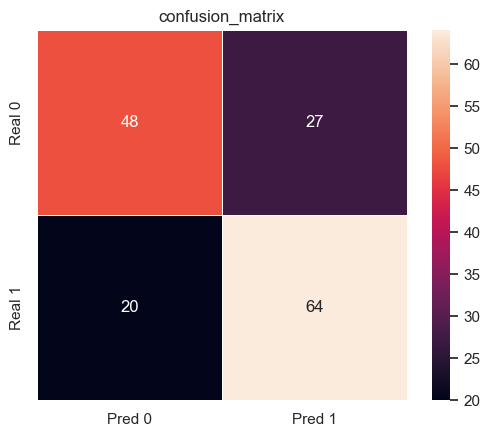

<Figure size 600x500 with 0 Axes>

In [37]:
ax = plt.axes()
ax.set_title("confusion_matrix")

df_cm=pd.DataFrame(confusion_matrix(Y_test, svm_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

# DecisionTreeClassifier

In [38]:
# Using Decision Trees

features_one = X_train[['Number Of Project', 'Average Monthly Hours', 'Time Spend Company ',
       'Satisfaction Level_High', 'Satisfaction Level_Low',
       'Satisfaction Level_Medium', 'Satisfaction Level_Very High',
       'Satisfaction Level_Very Low', 'Work accident_No', 'Work accident_Yes',
       'Promotion Last Five years _No', 'Promotion Last Five years _Yes',
       'Department_IT', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'Salary_high', 'Salary_low', 'Salary_medium']].values
num_folds = 10
num_instances = X_train.shape[0]
seed=7
scoring1 = 'accuracy'
scoring2 = 'roc_auc'
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
                               
decision_tree = DecisionTreeClassifier()
decision_tree.fit(features_one, Y_train)


# Print normal score
print(decision_tree.score(features_one, Y_train))

results1 =cross_val_score(decision_tree, features_one, Y_train, cv=kfold,scoring=scoring1)

#Print cross validation score
print(results1.mean(), results1.std())

results2 =cross_val_score(decision_tree, features_one, Y_train, cv=kfold,scoring=scoring2)

#Print AUC
print(results2.mean(), results2.std())

# Extract the features from the test set:
test_features = X_test[['Number Of Project', 'Average Monthly Hours', 'Time Spend Company ',
                        'Satisfaction Level_High', 'Satisfaction Level_Low','Satisfaction Level_Medium',
                        'Satisfaction Level_Very High','Satisfaction Level_Very Low', 'Work accident_No',
                        'Work accident_Yes','Promotion Last Five years _No', 'Promotion Last Five years _Yes',
                        'Department_IT', 'Department_RandD', 'Department_accounting',
                        'Department_hr', 'Department_management', 'Department_marketing',
                        'Department_product_mng', 'Department_sales', 'Department_support',
                        'Department_technical', 'Salary_high', 'Salary_low', 'Salary_medium']].values
# Make your prediction using the test set:
dt_prediction = decision_tree.predict(test_features)

acc_dt = accuracy_score(Y_test, dt_prediction)
precision_dt = precision_score(Y_test, dt_prediction)
recall_dt = recall_score(Y_test, dt_prediction)
f1score_dt = f1_score(Y_test, dt_prediction)
print("Accuracy of the algorithm: ", acc_dt)
print("Precison of the algorithm: ", precision_dt)
print("Recall of the algorithm: ", recall_dt)
print("F1_Score of the algorithm: ", f1score_dt)
print("Total number of employees which are likely to leave: ", sum(dt_prediction))


1.0
0.894069069069069 0.0427446254388175
0.8915598550486321 0.042986941729413274
Accuracy of the algorithm:  0.8805031446540881
Precison of the algorithm:  0.8823529411764706
Recall of the algorithm:  0.8928571428571429
F1_Score of the algorithm:  0.8875739644970414
Total number of employees which are likely to leave:  85


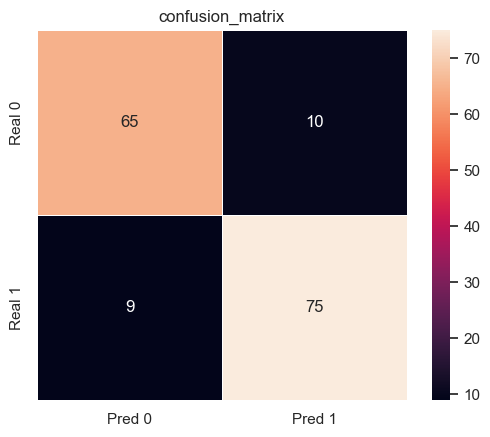

<Figure size 600x500 with 0 Axes>

In [39]:
ax = plt.axes()
ax.set_title("confusion_matrix")

df_cm=pd.DataFrame(confusion_matrix(Y_test, dt_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

# Logistic Regression

In [40]:


features_one = X_train[['Number Of Project', 'Average Monthly Hours', 'Time Spend Company ',
       'Satisfaction Level_High', 'Satisfaction Level_Low',
       'Satisfaction Level_Medium', 'Satisfaction Level_Very High',
       'Satisfaction Level_Very Low', 'Work accident_No', 'Work accident_Yes',
       'Promotion Last Five years _No', 'Promotion Last Five years _Yes',
       'Department_IT', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'Salary_high', 'Salary_low', 'Salary_medium']].values

num_folds = 10
num_instances = X_train.shape[0] 
seed=7
scoring1 = 'accuracy'
scoring2 = 'roc_auc'
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
                               
logistic_model = LogisticRegression()
logistic_model.fit(features_one, Y_train)

# Print the Models Coefficients
print(logistic_model.coef_)

# Print normal score
print(logistic_model.score(features_one, Y_train))

results1 =cross_val_score(logistic_model, features_one, Y_train, cv=kfold,scoring=scoring1)

#Print cross validation score
print(results1.mean(), results1.std())

results2 =cross_val_score(logistic_model, features_one, Y_train, cv=kfold,scoring=scoring2)

#Print AUC
print(results2.mean(), results2.std())

# Extract the features from the test set:
test_features = X_test[['Number Of Project', 'Average Monthly Hours', 'Time Spend Company ',
                        'Satisfaction Level_High', 'Satisfaction Level_Low','Satisfaction Level_Medium',
                        'Satisfaction Level_Very High','Satisfaction Level_Very Low', 'Work accident_No',
                        'Work accident_Yes','Promotion Last Five years _No', 'Promotion Last Five years _Yes',
                        'Department_IT', 'Department_RandD', 'Department_accounting',
                        'Department_hr', 'Department_management', 'Department_marketing',
                        'Department_product_mng', 'Department_sales', 'Department_support',
                        'Department_technical', 'Salary_high', 'Salary_low', 'Salary_medium']].values
# Make your prediction using the test set:
lg_prediction = logistic_model.predict(test_features)

acc_lg = accuracy_score(Y_test, lg_prediction)
precision_lg = precision_score(Y_test,lg_prediction)
recall_lg = recall_score(Y_test, lg_prediction)
f1score_lg = f1_score(Y_test, lg_prediction)
print("Accuracy of the algorithm: ", acc_lg)
print("Precison of the algorithm: ", precision_lg)
print("Recall of the algorithm: ", recall_lg)
print("F1_Score of the algorithm: ", f1score_lg)

print("Total number of employees which are likely to leave: ", sum(lg_prediction))



[[-5.60326016e-01  4.92593456e-04  1.21862500e+00 -1.58286290e+00
   1.24701737e+00 -5.07095262e-01 -1.17413908e+00  1.36190075e+00
   3.34537326e-01 -9.89716448e-01 -9.65787137e-01  3.10608015e-01
  -9.21726617e-04 -8.78439204e-01 -5.98546259e-01 -2.42429044e-01
  -2.15841632e-01 -1.37066775e-01  1.20748039e+00  2.42687657e-01
  -5.98896851e-02  2.77871553e-02 -1.33822871e-01 -7.34892716e-02
  -4.47866979e-01]]
0.8722826086956522
0.8369369369369369 0.0513118229401735
0.8571592348140336 0.0559238139669987
Accuracy of the algorithm:  0.7861635220125787
Precison of the algorithm:  0.7777777777777778
Recall of the algorithm:  0.8333333333333334
F1_Score of the algorithm:  0.8045977011494253
Total number of employees which are likely to leave:  90


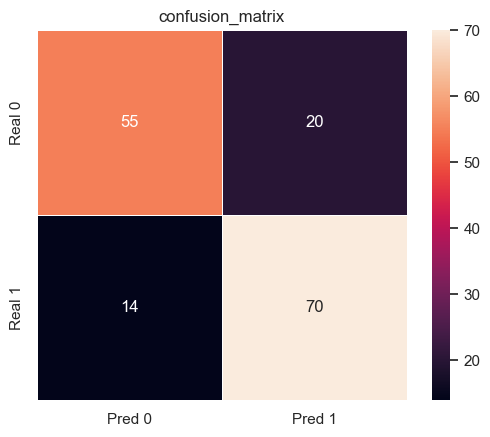

<Figure size 600x500 with 0 Axes>

In [41]:
ax = plt.axes()
ax.set_title("confusion_matrix")

df_cm=pd.DataFrame(confusion_matrix(Y_test, lg_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

# Adaboost Classifier

In [42]:
#Using Adaboost Classifier

features_one = X_train[['Number Of Project', 'Average Monthly Hours', 'Time Spend Company ',
       'Satisfaction Level_High', 'Satisfaction Level_Low',
       'Satisfaction Level_Medium', 'Satisfaction Level_Very High',
       'Satisfaction Level_Very Low', 'Work accident_No', 'Work accident_Yes',
       'Promotion Last Five years _No', 'Promotion Last Five years _Yes',
       'Department_IT', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'Salary_high', 'Salary_low', 'Salary_medium']].values
num_folds = 10
num_instances = X_train.shape[0] 
seed=7
scoring1 = 'accuracy'
scoring2 = 'roc_auc'
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
                               
ada = AdaBoostClassifier(n_estimators = 100,learning_rate=1.5)
ada.fit(features_one, Y_train)


# Print normal score
print(ada.score(features_one, Y_train))

results1 = cross_val_score(ada, features_one, Y_train , cv=kfold , scoring=scoring1)
print(results1)
#Print cross validation score
print(results1.mean(), results1.std())

results2 = cross_val_score(ada, features_one, Y_train, cv=kfold,scoring=scoring2)

#Print AUC
print(results2.mean(), results2.std())

# Extract the features from the test set:
test_features = X_test[['Number Of Project', 'Average Monthly Hours', 'Time Spend Company ',
                        'Satisfaction Level_High', 'Satisfaction Level_Low','Satisfaction Level_Medium',
                        'Satisfaction Level_Very High','Satisfaction Level_Very Low', 'Work accident_No',
                        'Work accident_Yes','Promotion Last Five years _No', 'Promotion Last Five years _Yes',
                        'Department_IT', 'Department_RandD', 'Department_accounting',
                        'Department_hr', 'Department_management', 'Department_marketing',
                        'Department_product_mng', 'Department_sales', 'Department_support',
                        'Department_technical', 'Salary_high', 'Salary_low', 'Salary_medium']].values
# Make your prediction using the test set:
ada_prediction = ada.predict(test_features)

acc_ab = accuracy_score(Y_test, ada_prediction)
precision_ab = precision_score(Y_test, ada_prediction)
recall_ab = recall_score(Y_test, ada_prediction)
f1score_ab = f1_score(Y_test, ada_prediction)
print("Accuracy of the algorithm: ", acc_ab)
print("Precison of the algorithm: ", precision_ab)
print("Recall of the algorithm: ", recall_ab)
print("F1_Score of the algorithm: ", f1score_ab)
print("Total number of employees which are likely to leave: ", sum(ada_prediction))


0.9538043478260869
[0.86486486 0.89189189 0.94594595 0.83783784 0.89189189 0.89189189
 0.86486486 0.83783784 0.88888889 0.75      ]
0.8665915915915916 0.048956835802283744
0.9252090822833857 0.047481519786610124
Accuracy of the algorithm:  0.8427672955974843
Precison of the algorithm:  0.8172043010752689
Recall of the algorithm:  0.9047619047619048
F1_Score of the algorithm:  0.8587570621468926
Total number of employees which are likely to leave:  93


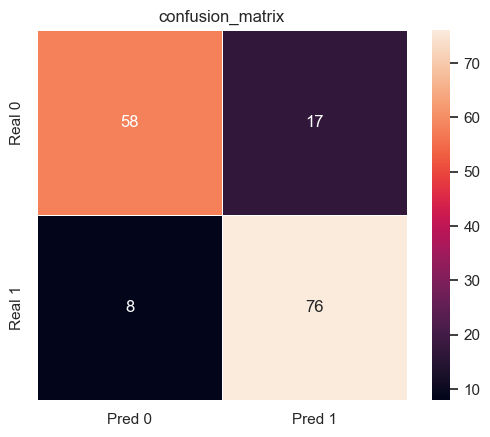

<Figure size 600x500 with 0 Axes>

In [43]:
ax = plt.axes()
ax.set_title("confusion_matrix")

df_cm=pd.DataFrame(confusion_matrix(Y_test, ada_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

In [44]:
# Define the parameter grid for grid search
param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0, 1.5]}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=kfold, scoring=scoring1)
grid_search.fit(features_one, Y_train)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create an AdaBoost classifier with the best parameters
best_ada = AdaBoostClassifier(**best_params)
best_ada.fit(features_one, Y_train)

# Make predictions using the test set with the best model
best_ada_prediction = best_ada.predict(test_features)

# Calculate evaluation metrics for the best model
best_acc = accuracy_score(Y_test, best_ada_prediction)
best_precision = precision_score(Y_test, best_ada_prediction)
best_recall = recall_score(Y_test, best_ada_prediction)
best_f1score = f1_score(Y_test, best_ada_prediction)

print("Accuracy after hyperparameter tuning:", best_acc)
print("Precision after hyperparameter tuning:", best_precision)
print("Recall after hyperparameter tuning:", best_recall)
print("F1 Score after hyperparameter tuning:", best_f1score)


Accuracy after hyperparameter tuning: 0.8553459119496856
Precision after hyperparameter tuning: 0.8080808080808081
Recall after hyperparameter tuning: 0.9523809523809523
F1 Score after hyperparameter tuning: 0.8743169398907102


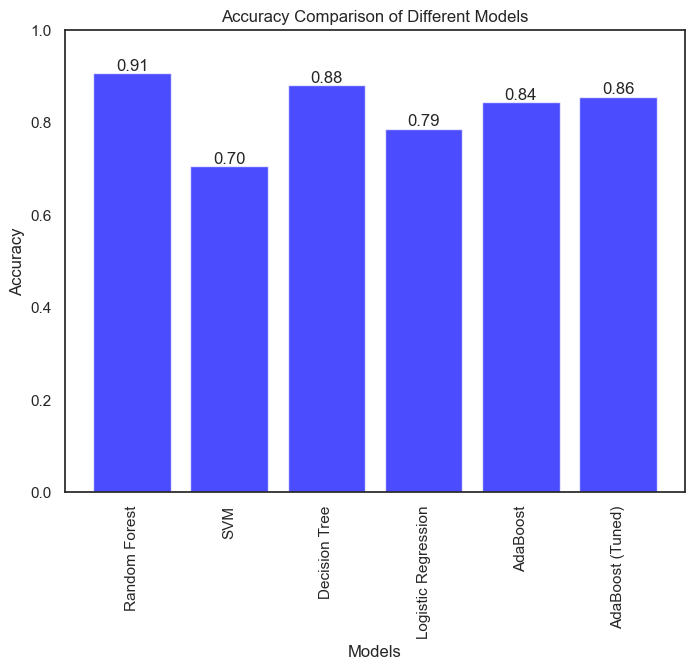

In [45]:
import matplotlib.pyplot as plt

# Accuracy scores of different models
accuracy_scores = [acc_rf, acc, acc_dt, acc_lg, acc_ab, best_acc]

# Model names
models = ['Random Forest', 'SVM', 'Decision Tree', 'Logistic Regression', 'AdaBoost', 'AdaBoost (Tuned)']

# Plotting the accuracy scores
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color='blue', alpha=0.7)
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xticks(rotation=90)
# Adding numeric values on top of each bar
for i in range(len(models)):
    plt.text(i, accuracy_scores[i], f"{accuracy_scores[i]:.2f}", ha='center', va='bottom')
plt.show()
